# -SPAM EMAIL DETECTION-
## Import Necessory library

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
#importing libraries for models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

## Reading The Dataset:

In [216]:
dataset=pd.read_csv("dataset3.csv")
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [217]:
dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [232]:
print(dataset.shape)

(5572, 2)


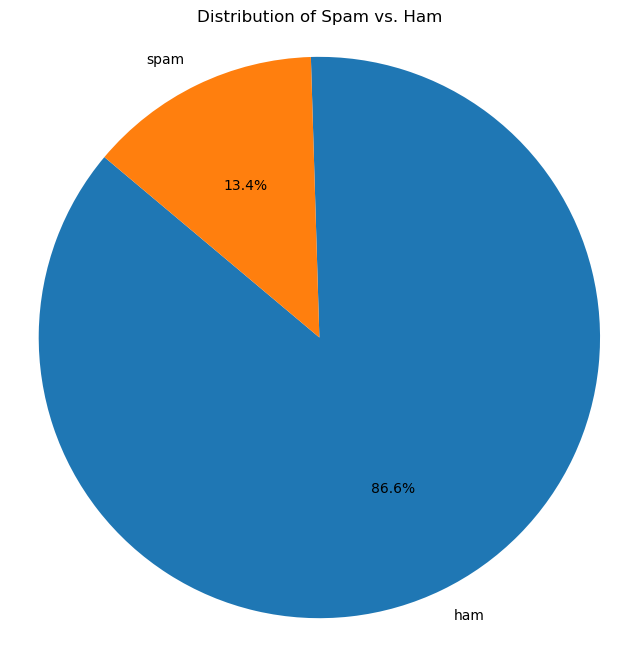

In [233]:
category_counts = dataset['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [234]:
x = dataset.iloc[:,1].values
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [235]:
y = dataset.iloc[:,0].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [236]:
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

## Create Train and Test dataset using test_train_split
 

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [238]:
print(x_test)

['Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It\'s d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@'
 '<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.'
 "And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed"
 ...
 'I got a call from a landline number. . . I am asked to come to anna nagar . . . I will go in the afternoon'
 '#ERROR!' 'What you doing?how are you?']


In [239]:
print(y_test)

[0 1 0 ... 0 1 0]


In [266]:
# x_train=x_train.tolist()
# x_test=x_test.tdolist()

In [267]:
x_train=[str(review).lower() for review in x_train]
x_test= [str(review).lower() for review in x_test]

In [268]:
x_train

['  (0, 2055)\t0.5275950100112894\n  (0, 2462)\t0.3830629120428951\n  (0, 2339)\t0.6432890000141205\n  (0, 1680)\t0.4013546726889294',
 '  (0, 2377)\t0.892890838351112\n  (0, 1578)\t0.45027319572527125',
 '  (0, 827)\t0.5010744029902795\n  (0, 427)\t0.5928070751988304\n  (0, 2233)\t0.5299087670683588\n  (0, 2462)\t0.341615153127368',
 '  (0, 748)\t0.6489221209014988\n  (0, 756)\t0.44843330753299465\n  (0, 1802)\t0.38536596088088965\n  (0, 1689)\t0.3618113574629584\n  (0, 1980)\t0.31367701143832527',
 '  (0, 1991)\t1.0',
 '  (0, 1961)\t0.6020708068994186\n  (0, 4857)\t0.7984426989330436',
 '  (0, 3298)\t0.34949590962965627\n  (0, 2275)\t0.31380741009360746\n  (0, 2226)\t0.8364842583205538\n  (0, 3251)\t0.28226158807814167',
 '  (0, 4790)\t0.5906953713270199\n  (0, 1272)\t0.5702310557082301\n  (0, 4942)\t0.36462394434004697\n  (0, 2458)\t0.3528165619322648\n  (0, 1980)\t0.26169710399412954',
 '  (0, 2041)\t0.3964903124827795\n  (0, 2850)\t0.5754495894630033\n  (0, 4154)\t0.48517568061674

In [269]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [270]:
vectorizer = TfidfVectorizer(min_df =1, stop_words = 'english', lowercase = True, max_features=5000)

In [271]:
x_train = vectorizer.fit_transform(x_train)
x_test  = vectorizer.transform(x_test)

In [272]:
modelLR = LogisticRegression()
lr=modelLR.fit(x_train, y_train)

In [273]:
lr

LogisticRegression()

In [274]:
pre_model_test = lr.predict(x_test)

In [275]:
pre_model_test

array([0, 0, 0, ..., 0, 0, 0])

In [251]:
from sklearn.metrics import mean_absolute_error

In [252]:
acc_score = accuracy_score(y_test, pre_model_test)
acc_score

0.968609865470852

In [253]:
acc_score2 = classification_report(y_test, pre_model_test)
acc_score2

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       955\n           1       0.99      0.79      0.88       160\n\n    accuracy                           0.97      1115\n   macro avg       0.98      0.89      0.93      1115\nweighted avg       0.97      0.97      0.97      1115\n'

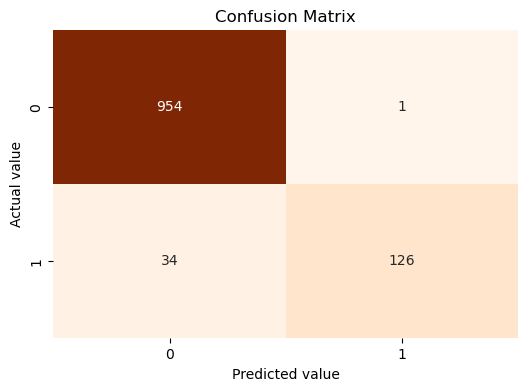

In [254]:
conf_matrix=confusion_matrix(y_test,pre_model_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [255]:
modelrfc = RandomForestClassifier()
rfc=modelrfc.fit(x_train, y_train)
pre_model_test2 = rfc.predict(x_test)

In [256]:
pre_model_test2

array([0, 1, 0, ..., 0, 1, 0])

In [257]:
print("rfc")
acc_score = accuracy_score(y_test, pre_model_test2)
print(acc_score)
acc_score2 = classification_report(y_test, pre_model_test2)
print(acc_score2)

rfc
0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



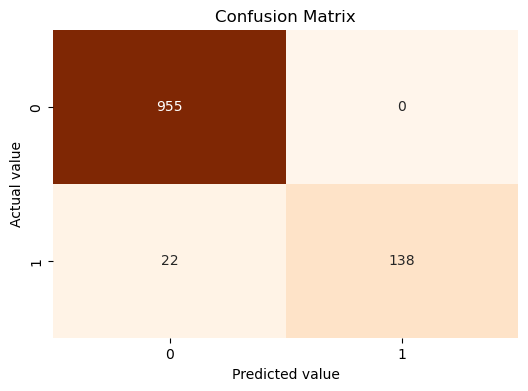

In [258]:
conf_matrix=confusion_matrix(y_test,pre_model_test2)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [259]:
modelabc = AdaBoostClassifier()
abc=modelrfc.fit(x_train, y_train)
pre_model_test = abc.predict(x_test)

In [260]:
pre_model_test

array([0, 1, 0, ..., 0, 1, 0])

In [261]:
print("abc")
acc_score = accuracy_score(y_test, pre_model_test)
print(acc_score)
acc_score2 = classification_report(y_test, pre_model_test)
print(acc_score2)

abc
0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.99      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



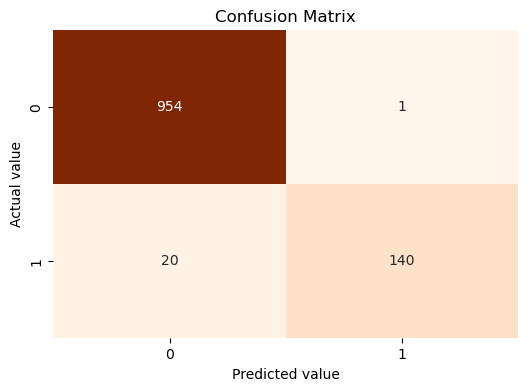

In [262]:
conf_matrix=confusion_matrix(y_test,pre_model_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [263]:
modelknn = KNeighborsClassifier()
knn=modelknn.fit(x_train, y_train)
pre_model_test = knn.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [264]:
print("knn")
acc_score = accuracy_score(y_test, pre_model_test)
print(acc_score)
acc_score2 = classification_report(y_test, pre_model_test)
print(acc_score2)

knn
0.9067264573991032
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       955
           1       1.00      0.35      0.52       160

    accuracy                           0.91      1115
   macro avg       0.95      0.68      0.73      1115
weighted avg       0.92      0.91      0.89      1115



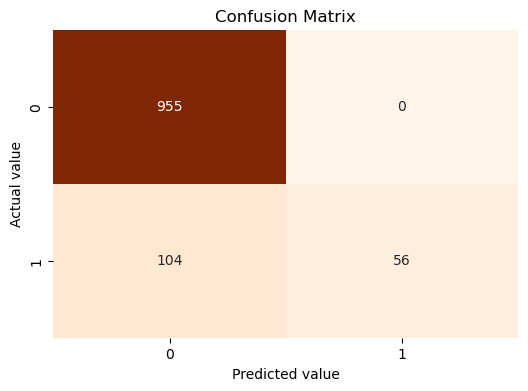

In [265]:
conf_matrix=confusion_matrix(y_test,pre_model_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()